# Portfolio with the Maximum Sortino Ratio for the Oil & Gas Sector

In [1]:
from pandas_datareader import data
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [20]:
# Establishing Dates
start = "2017-01-01"
end = "2021-12-31"

# Establishing Assets
assets = ['RELIANCE.NS', 'ONGC.NS', 'BPCL.NS', 'IOC.NS',
         'GAIL.NS', 'HINDPETRO.NS', 'IGL.NS', 'PETRONET.NS', 'GUJGASLTD.NS']


#252 trading days in a year
N = 252

#1% risk free rate
rf =0.02

# Creating an empty dataframe
df_prices = pd.DataFrame()

# Getting the "Adj Close" data from Yahoo Finance by defining a function
# This function lists the price data as daily percent change 
def YahooData(dataframe, assets_list, start_date, end_date):
    for i in assets_list:
        dataframe[i] = data.DataReader(i, data_source = "yahoo", start=start_date, end=end_date)['Adj Close']
    return dataframe

# Running the function that we just made and saving the results to the DataFrame
df = YahooData(df_prices, assets, start, end)

In [21]:
df.to_csv("oil_and_gas.csv")

In [2]:
df = pd.read_csv("oil_and_gas.csv", index_col=0)

In [3]:
df.head()

RELIANCE.NS     ONGC.NS     BPCL.NS      IOC.NS     GAIL.NS  \
Date                                                                      
02-01-2017   523.695190  151.009064  294.938843  112.156014  100.922005   
03-01-2017   525.770508  151.205444  299.566773  118.252777  102.383125   
04-01-2017   515.032166  153.012039  301.823029  117.464989  102.081619   
05-01-2017   519.979004  156.821594  309.766418  120.753097  102.545471   
06-01-2017   518.796509  159.099533  306.151611  118.629540  102.638245   

            HINDPETRO.NS      IGL.NS  PETRONET.NS  GUJGASLTD.NS  
Date                                                             
02-01-2017    207.680328  178.249451   152.257187    103.674927  
03-01-2017    214.279938  183.494064   156.321747    104.604263  
04-01-2017    212.733871  181.303192   153.961029    104.741211  
05-01-2017    218.271973  180.537308   155.295334    104.946648  
06-01-2017    215.387543  178.937759   153.447830    103.107544

In [4]:
# Calculating Log Return
df = np.log(df/df.shift(1))

# Dropping the first row because it's N/A
df = df.dropna()

# Viewing df head
df

RELIANCE.NS   ONGC.NS   BPCL.NS    IOC.NS   GAIL.NS  HINDPETRO.NS  \
Date                                                                            
03-01-2017     0.003955  0.001300  0.015569  0.052934  0.014374      0.031283   
04-01-2017    -0.020635  0.011877  0.007504 -0.006684 -0.002949     -0.007241   
05-01-2017     0.009559  0.024592  0.025978  0.027608  0.004534      0.025700   
06-01-2017    -0.002277  0.014421 -0.011738 -0.017742  0.000904     -0.013303   
09-01-2017     0.002555 -0.022720 -0.017831 -0.010303 -0.015600     -0.007960   
...                 ...       ...       ...       ...       ...           ...   
27-12-2021    -0.001075 -0.008338  0.006028  0.004525 -0.002295     -0.003091   
28-12-2021     0.011806  0.015532  0.015899  0.013898  0.018969      0.011966   
29-12-2021     0.001708 -0.004310  0.001839 -0.007149 -0.006031     -0.006307   
30-12-2021    -0.018230  0.011453 -0.008300 -0.008557 -0.004689     -0.012908   
31-12-2021     0.003829  0.013432  0.019650  0.008557  0.012069      0.012737   

              IGL.NS  PETRONET.NS  GUJGASLTD.NS  
Date                                             
03-01-2017  0.028998     0.026345      0.008924  
04-01-2017 -0.012012    -0.015217      0.001308  
05-01-2017 -0.004233     0.008629      0.001959  
06-01-2017 -0.008899    -0.011968     -0.017680  
09-01-2017 -0.000867    -0.000669      0.042354  
...              ...          ...           ...  
27-12-2021 -0.021163     0.002312     -0.006935  
28-12-2021 -0.010282     0.003457      0.017917  
29-12-2021  0.000104    -0.001151     -0.007572  
30-12-2021 -0.026979    -0.012518     -0.008907  
31-12-2021  0.008861     0.009518      0.014118  

[1235 rows x 9 columns]

In [5]:
assets = ['RELIANCE.NS', 'ONGC.NS', 'BPCL.NS', 'IOC.NS',
         'GAIL.NS', 'HINDPETRO.NS', 'IGL.NS', 'PETRONET.NS', 'GUJGASLTD.NS']
# Creating 10000 random simulations of each portfolio weight configuration
num_runs = 10000 # number of rows/iterations

# Creating a Matrix with 10000 rows, with each row representing a random portfolio:
    #first 3 columns are Mean Returns, Standard Deviation, and Sortino Ratio
    # remaining columns are each assets random weight within that random portfolio
result = np.zeros((num_runs,(len(assets)+5)))
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
df.shape

(1235, 9)

In [7]:
df.head()

RELIANCE.NS   ONGC.NS   BPCL.NS    IOC.NS   GAIL.NS  HINDPETRO.NS  \
Date                                                                            
03-01-2017     0.003955  0.001300  0.015569  0.052934  0.014374      0.031283   
04-01-2017    -0.020635  0.011877  0.007504 -0.006684 -0.002949     -0.007241   
05-01-2017     0.009559  0.024592  0.025978  0.027608  0.004534      0.025700   
06-01-2017    -0.002277  0.014421 -0.011738 -0.017742  0.000904     -0.013303   
09-01-2017     0.002555 -0.022720 -0.017831 -0.010303 -0.015600     -0.007960   

              IGL.NS  PETRONET.NS  GUJGASLTD.NS  
Date                                             
03-01-2017  0.028998     0.026345      0.008924  
04-01-2017 -0.012012    -0.015217      0.001308  
05-01-2017 -0.004233     0.008629      0.001959  
06-01-2017 -0.008899    -0.011968     -0.017680  
09-01-2017 -0.000867    -0.000669      0.042354

In [8]:
df_training = df[0:987]
df_training.columns

Index(['RELIANCE.NS', 'ONGC.NS', 'BPCL.NS', 'IOC.NS', 'GAIL.NS',
       'HINDPETRO.NS', 'IGL.NS', 'PETRONET.NS', 'GUJGASLTD.NS'],
      dtype='object')

In [9]:
df_training.shape

(987, 9)

In [10]:
df_training.tail()

RELIANCE.NS   ONGC.NS   BPCL.NS    IOC.NS   GAIL.NS  HINDPETRO.NS  \
Date                                                                            
24-12-2020     0.025547  0.025552  0.008378  0.023544  0.015940      0.015804   
28-12-2020     0.004578  0.006954  0.013679  0.015939  0.020594      0.007229   
29-12-2020    -0.006636 -0.006954 -0.003271 -0.005468  0.008929      0.000929   
30-12-2020     0.002735  0.001073  0.003532 -0.003295 -0.005266      0.004863   
31-12-2020    -0.005125 -0.002147 -0.004582  0.000550  0.001218      0.006677   

              IGL.NS  PETRONET.NS  GUJGASLTD.NS  
Date                                             
24-12-2020  0.001023    -0.011313      0.031362  
28-12-2020  0.001838     0.020312     -0.001598  
29-12-2020  0.042058    -0.016662      0.014950  
30-12-2020 -0.010918    -0.002026      0.003801  
31-12-2020 -0.006350     0.004453     -0.015292

In [11]:
df_test= df[987:]
df_test.head()

RELIANCE.NS   ONGC.NS   BPCL.NS    IOC.NS   GAIL.NS  HINDPETRO.NS  \
Date                                                                            
01-01-2021     0.001107  0.001611  0.002228  0.006029  0.003240      0.015257   
04-01-2021     0.001684  0.039448  0.034482  0.025359  0.034575      0.006757   
05-01-2021    -0.012510 -0.020845 -0.008510 -0.009098  0.010105      0.001570   
06-01-2021    -0.026726  0.020845 -0.012062  0.011759  0.035704     -0.009684   
07-01-2021    -0.001621  0.009751  0.012572  0.004242 -0.004113      0.008338   

              IGL.NS  PETRONET.NS  GUJGASLTD.NS  
Date                                             
01-01-2021  0.009510     0.009046      0.004242  
04-01-2021 -0.000888     0.010352      0.003565  
05-01-2021  0.024081     0.015525      0.026533  
06-01-2021  0.044004    -0.001171     -0.008378  
07-01-2021 -0.004435     0.014152      0.001423

In [12]:
df_test.shape

(248, 9)

In [33]:
#df = df.copy()
for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(assets))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    # daily return of the portfolio based on a given set of weights
    df_training['portfolio_ret'] = df_training.iloc[:,0]*weights[0]+df_training.iloc[:,1]*weights[1]+df_training.iloc[:,2]*weights[2]
    
    # Calculating Mean
    E = df_training['portfolio_ret'].mean()
    # Annualizing Mean
    E_AN = E * N
    
    # Calculating Downside Standard Deviation
    mean = E * N -rf
    std_neg = df_training['portfolio_ret'][df_training['portfolio_ret']<0].std()*np.sqrt(N)
    
    
    # Calculating Upside Standard Deviation
    std_pos = df_training['portfolio_ret'][df_training['portfolio_ret']>=0].std()*np.sqrt(N)
    
    # Calculating Volatility Skewness
    VS = std_pos/std_neg
    
    # Sortino
    Sortino = mean/std_neg
   
    # Populating the 'result' array with the required values: Mean, SD, Sharpe followed by the weights                   
    result[i,0] = E_AN
    result[i,1] = std_neg
    result[i,2] = std_pos
    result[i,3] = VS
    result[i,4] = Sortino
    
    for j in range(len(assets)):
        result[i,j+5]= weights[j]

In [34]:
# Converting 'result' into a DataFrame

columns = ['Mean','Downside SD', 'Upside SD', 'Volatility Skewness', 'Sortino'] + assets

result = pd.DataFrame(result,columns=columns)
result

Mean  Downside SD  Upside SD  Volatility Skewness   Sortino  \
0    -0.002222     0.033759   0.027381             0.811068 -0.658253   
1     0.035897     0.106863   0.084837             0.793885  0.148757   
2     0.010154     0.077391   0.061563             0.795484 -0.127231   
3     0.032678     0.094263   0.075436             0.800277  0.134497   
4     0.015034     0.051784   0.041123             0.794123 -0.095899   
...        ...          ...        ...                  ...       ...   
9995 -0.003512     0.097031   0.078281             0.806757 -0.242316   
9996  0.007058     0.061176   0.051297             0.838513 -0.211554   
9997  0.017167     0.098968   0.078850             0.796726 -0.028623   
9998  0.056280     0.074983   0.064099             0.854856  0.483845   
9999  0.043596     0.071703   0.060437             0.842879  0.329077   

      RELIANCE.NS   ONGC.NS   BPCL.NS    IOC.NS   GAIL.NS  HINDPETRO.NS  \
0        0.020749  0.074393  0.040536  0.163021  0.157199      0.085329   
1        0.160994  0.161215  0.131313  0.084980  0.158456      0.139103   
2        0.072186  0.127021  0.117315  0.100739  0.083610      0.085315   
3        0.135079  0.123642  0.140207  0.048772  0.161023      0.138442   
4        0.074883  0.086166  0.058333  0.005949  0.269013      0.226222   
...           ...       ...       ...       ...       ...           ...   
9995     0.057983  0.193892  0.136854  0.161732  0.029580      0.124449   
9996     0.087377  0.161251  0.005549  0.099094  0.034910      0.184560   
9997     0.117885  0.185742  0.110586  0.173553  0.044085      0.050610   
9998     0.180299  0.055859  0.097117  0.171256  0.150094      0.018194   
9999     0.113990  0.002441  0.171660  0.049025  0.170431      0.067063   

        IGL.NS  PETRONET.NS  GUJGASLTD.NS  
0     0.182907     0.186632      0.089233  
1     0.027273     0.000711      0.135955  
2     0.168510     0.184171      0.061133  
3     0.090265     0.139564      0.023006  
4     0.153842     0.057259      0.068332  
...        ...          ...           ...  
9995  0.052859     0.105355      0.137297  
9996  0.206905     0.137087      0.083267  
9997  0.087684     0.116816      0.113040  
9998  0.073467     0.073645      0.180070  
9999  0.153898     0.144406      0.127087  

[10000 rows x 14 columns]

In [35]:
result.head()

Mean  Downside SD  Upside SD  Volatility Skewness   Sortino  \
0 -0.002222     0.033759   0.027381             0.811068 -0.658253   
1  0.035897     0.106863   0.084837             0.793885  0.148757   
2  0.010154     0.077391   0.061563             0.795484 -0.127231   
3  0.032678     0.094263   0.075436             0.800277  0.134497   
4  0.015034     0.051784   0.041123             0.794123 -0.095899   

   RELIANCE.NS   ONGC.NS   BPCL.NS    IOC.NS   GAIL.NS  HINDPETRO.NS  \
0     0.020749  0.074393  0.040536  0.163021  0.157199      0.085329   
1     0.160994  0.161215  0.131313  0.084980  0.158456      0.139103   
2     0.072186  0.127021  0.117315  0.100739  0.083610      0.085315   
3     0.135079  0.123642  0.140207  0.048772  0.161023      0.138442   
4     0.074883  0.086166  0.058333  0.005949  0.269013      0.226222   

     IGL.NS  PETRONET.NS  GUJGASLTD.NS  
0  0.182907     0.186632      0.089233  
1  0.027273     0.000711      0.135955  
2  0.168510     0.184171      0.061133  
3  0.090265     0.139564      0.023006  
4  0.153842     0.057259      0.068332

In [13]:
df.head()

RELIANCE.NS   ONGC.NS   BPCL.NS    IOC.NS   GAIL.NS  HINDPETRO.NS  \
Date                                                                            
03-01-2017     0.003955  0.001300  0.015569  0.052934  0.014374      0.031283   
04-01-2017    -0.020635  0.011877  0.007504 -0.006684 -0.002949     -0.007241   
05-01-2017     0.009559  0.024592  0.025978  0.027608  0.004534      0.025700   
06-01-2017    -0.002277  0.014421 -0.011738 -0.017742  0.000904     -0.013303   
09-01-2017     0.002555 -0.022720 -0.017831 -0.010303 -0.015600     -0.007960   

              IGL.NS  PETRONET.NS  GUJGASLTD.NS  
Date                                             
03-01-2017  0.028998     0.026345      0.008924  
04-01-2017 -0.012012    -0.015217      0.001308  
05-01-2017 -0.004233     0.008629      0.001959  
06-01-2017 -0.008899    -0.011968     -0.017680  
09-01-2017 -0.000867    -0.000669      0.042354

In [14]:
df_training = df[0:987]
df_training.columns

Index(['RELIANCE.NS', 'ONGC.NS', 'BPCL.NS', 'IOC.NS', 'GAIL.NS',
       'HINDPETRO.NS', 'IGL.NS', 'PETRONET.NS', 'GUJGASLTD.NS'],
      dtype='object')

In [15]:
df_training.shape

(987, 9)

In [16]:
df_test= df[987:]
df_test.head()

RELIANCE.NS   ONGC.NS   BPCL.NS    IOC.NS   GAIL.NS  HINDPETRO.NS  \
Date                                                                            
01-01-2021     0.001107  0.001611  0.002228  0.006029  0.003240      0.015257   
04-01-2021     0.001684  0.039448  0.034482  0.025359  0.034575      0.006757   
05-01-2021    -0.012510 -0.020845 -0.008510 -0.009098  0.010105      0.001570   
06-01-2021    -0.026726  0.020845 -0.012062  0.011759  0.035704     -0.009684   
07-01-2021    -0.001621  0.009751  0.012572  0.004242 -0.004113      0.008338   

              IGL.NS  PETRONET.NS  GUJGASLTD.NS  
Date                                             
01-01-2021  0.009510     0.009046      0.004242  
04-01-2021 -0.000888     0.010352      0.003565  
05-01-2021  0.024081     0.015525      0.026533  
06-01-2021  0.044004    -0.001171     -0.008378  
07-01-2021 -0.004435     0.014152      0.001423

In [17]:
df_test.shape

(248, 9)

In [58]:
Max_Sortino = result.iloc[result['Sortino'].idxmax()]
Max_Sortino

Mean                   0.099008
Downside SD            0.073150
Upside SD              0.075459
Volatility Skewness    1.031567
Sortino                1.080087
RELIANCE.NS            0.290036
ONGC.NS                0.003606
BPCL.NS                0.035064
IOC.NS                 0.000667
GAIL.NS                0.219917
HINDPETRO.NS           0.223021
IGL.NS                 0.073594
PETRONET.NS            0.122709
GUJGASLTD.NS           0.031386
Name: 5685, dtype: float64

In [59]:
Min_DSD = result.iloc[result['Downside SD'].idxmin()]
Min_DSD

Mean                   0.008196
Downside SD            0.009574
Upside SD              0.008430
Volatility Skewness    0.880501
Sortino               -1.232912
RELIANCE.NS            0.026420
ONGC.NS                0.007471
BPCL.NS                0.009277
IOC.NS                 0.234453
GAIL.NS                0.064571
HINDPETRO.NS           0.074689
IGL.NS                 0.207642
PETRONET.NS            0.185177
GUJGASLTD.NS           0.190301
Name: 1577, dtype: float64

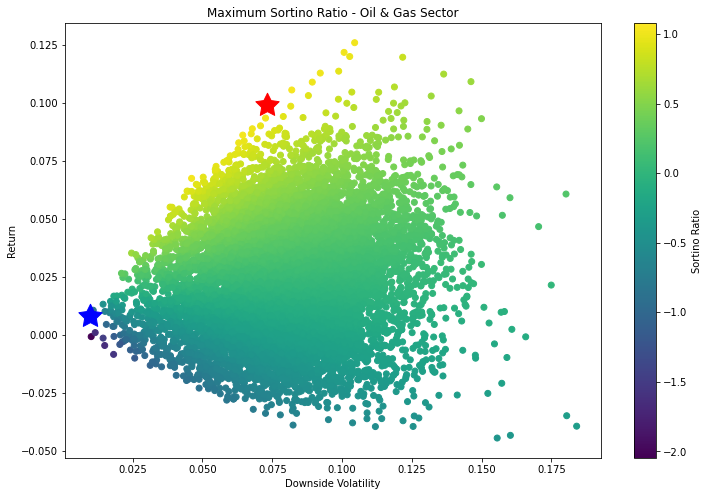

In [60]:
plt.figure(figsize=(12,8))
plt.scatter(x=result['Downside SD'],y=result['Mean'],c=result['Sortino'],cmap='viridis')
plt.colorbar(label='Sortino Ratio')
plt.xlabel('Downside Volatility')
plt.ylabel('Return')

plt.title('Maximum Sortino Ratio - Oil & Gas Sector')
#Plot a red star to highlight position of the portfolio with highest Sortino Ratio
plt.scatter(Max_Sortino[1],Max_Sortino[0],marker=(5,1,0),color='r',s=600)
plt.scatter(Min_DSD[1],Min_DSD[0],marker=(5,1,0),color='b',s=600)

plt.show()

In [18]:
# Portfolio with the maximum Sharpe Ratio
w_raw = [0.3047, 0.0064, 0.0831, 0.0726, 0.0161, 0.0055, 0.1980, 0.0001, 0.3135]
#w_eigen = [i * 100 for i in w_raw]
print(w_raw)

w_1 = pd.DataFrame(w_raw, index = ['RELIANCE.NS', 'ONGC.NS', 'BPCL.NS', 'IOC.NS',
         'GAIL.NS', 'HINDPETRO.NS', 'IGL.NS', 'PETRONET.NS', 'GUJGASLTD.NS'])
w_1.columns = ['weights']
w_1

[0.3047, 0.0064, 0.0831, 0.0726, 0.0161, 0.0055, 0.198, 0.0001, 0.3135]


weights
RELIANCE.NS    0.3047
ONGC.NS        0.0064
BPCL.NS        0.0831
IOC.NS         0.0726
GAIL.NS        0.0161
HINDPETRO.NS   0.0055
IGL.NS         0.1980
PETRONET.NS    0.0001
GUJGASLTD.NS   0.3135

In [19]:
# Portfolio with the maximum Sortino Ratio
w_raw = [0.2900, 0.0036, 0.0351, 0.0007, 0.2199, 0.2230, 0.0736, 0.1227, 0.0314]
#w_eigen = [i * 100 for i in w_raw]
# print(w_raw)

w_2 = pd.DataFrame(w_raw, index = ['RELIANCE.NS', 'ONGC.NS', 'BPCL.NS', 'IOC.NS',
         'GAIL.NS', 'HINDPETRO.NS', 'IGL.NS', 'PETRONET.NS', 'GUJGASLTD.NS'])
w_2.columns = ['weights']
w_2

weights
RELIANCE.NS    0.2900
ONGC.NS        0.0036
BPCL.NS        0.0351
IOC.NS         0.0007
GAIL.NS        0.2199
HINDPETRO.NS   0.2230
IGL.NS         0.0736
PETRONET.NS    0.1227
GUJGASLTD.NS   0.0314

In [20]:
w_raw = [0.2666, 0.0012, 0.0007, 0.0495, 0.2175, 0.1550, 0.0938, 0.1128, 0.1029]
w_3 = pd.DataFrame(w_raw, index = ['RELIANCE.NS', 'ONGC.NS', 'BPCL.NS', 'IOC.NS',
         'GAIL.NS', 'HINDPETRO.NS', 'IGL.NS', 'PETRONET.NS', 'GUJGASLTD.NS'])
w_3.columns = ['weights']
w_3

weights
RELIANCE.NS    0.2666
ONGC.NS        0.0012
BPCL.NS        0.0007
IOC.NS         0.0495
GAIL.NS        0.2175
HINDPETRO.NS   0.1550
IGL.NS         0.0938
PETRONET.NS    0.1128
GUJGASLTD.NS   0.1029

In [21]:
frames = [w_1, w_2, w_3]
  
result_1 = pd.concat(frames,axis=1)
#result.rename(columns={"weights": "HRP", "weights": "HERC", "weights": "EIGEN"}, inplace=True)
df_port = result_1.set_axis(['Sharpe Ratio', 'Sortino Ratio', 'Max Calmar Ratio'], axis=1, inplace=False)
#df3 =df3/100
display(df_port)

Sharpe Ratio  Sortino Ratio  Max Calmar Ratio
RELIANCE.NS         0.3047         0.2900            0.2666
ONGC.NS             0.0064         0.0036            0.0012
BPCL.NS             0.0831         0.0351            0.0007
IOC.NS              0.0726         0.0007            0.0495
GAIL.NS             0.0161         0.2199            0.2175
HINDPETRO.NS        0.0055         0.2230            0.1550
IGL.NS              0.1980         0.0736            0.0938
PETRONET.NS         0.0001         0.1227            0.1128
GUJGASLTD.NS        0.3135         0.0314            0.1029

Text(0.5, 1.0, 'Portfolio with Max Calmar Ratio')

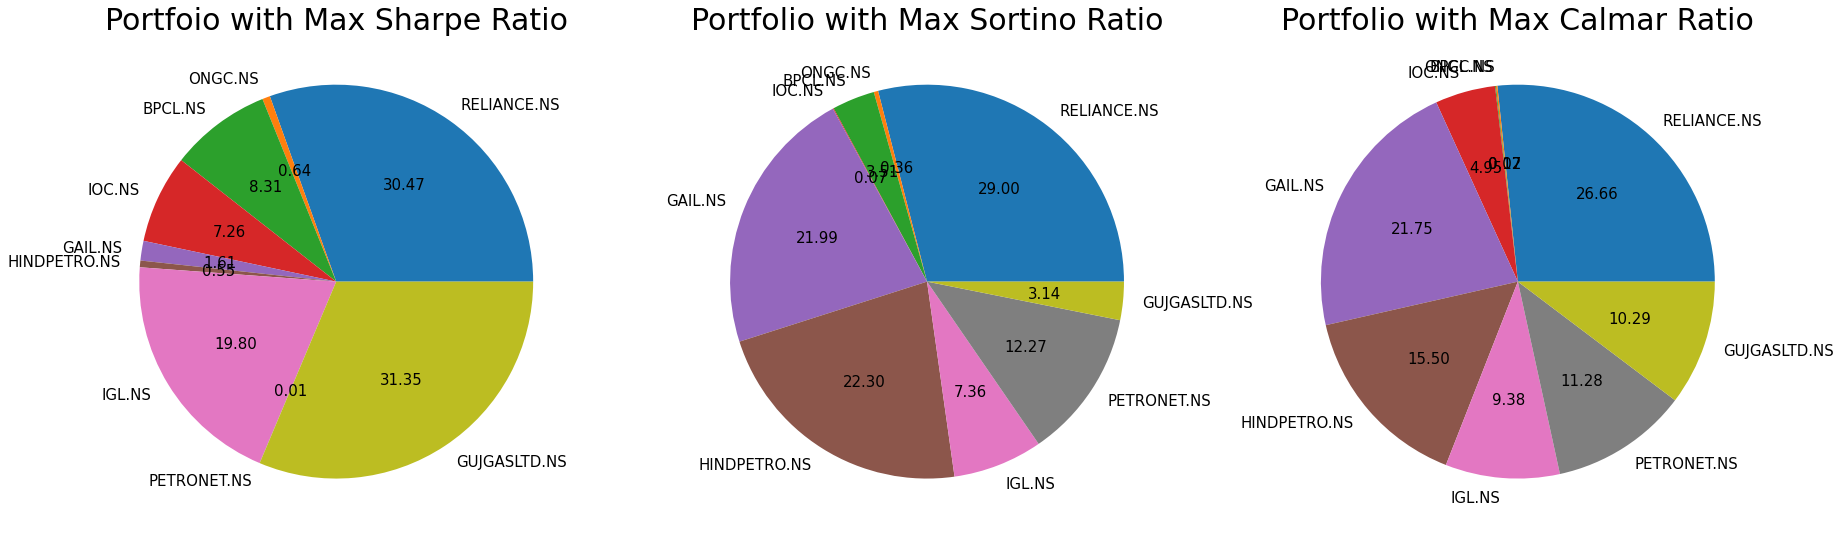

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(30,20))
ax1.pie(df_port.iloc[:,0], labels= df_port.index, autopct='%.2f', textprops={'fontsize': 15});
ax1.set_title('Portfoio with Max Sharpe Ratio',fontsize = 30)
ax2.pie(df_port.iloc[:,1], labels=df_port.index, autopct='%.2f', textprops={'fontsize': 15});
ax2.set_title('Portfolio with Max Sortino Ratio',fontsize = 30)
ax3.pie(df_port.iloc[:, 2], labels=df_port.index, autopct='%.2f', textprops={'fontsize':15})
ax3.set_title('Portfolio with Max Calmar Ratio',fontsize = 30)
#portfolios.plot.pie(subplots=True, figsize=(20, 10),legend = False);

In [23]:
df_training.shape

(987, 9)

In [24]:
Insample_Result=pd.DataFrame(np.dot(df_training, np.array(df_port)), \
                             columns=['Max Sharpe Ratio Portfolio', 'Max Sortino Ratio Portfolio', 'Max Calmar Ratio'], index = df_training.index)
OutOfSample_Result=pd.DataFrame(np.dot(df_test,np.array(df_port)), \
                                columns=['Max Sharpe Ratio Portfolio', 'Max Sortino Ratio Portfolio', 'Max Calmar Ratio'], index = df_test.index)

In [25]:
Insample_Result.head(20)

Max Sharpe Ratio Portfolio  Max Sortino Ratio Portfolio  \
Date                                                                  
03-01-2017                    0.015296                     0.017519   
04-01-2017                   -0.008130                    -0.010656   
05-01-2017                    0.007224                     0.011329   
06-01-2017                   -0.010229                    -0.006479   
09-01-2017                    0.011215                    -0.003995   
10-01-2017                    0.005641                     0.010650   
11-01-2017                   -0.002945                     0.007516   
12-01-2017                   -0.000833                     0.000700   
13-01-2017                   -0.003337                     0.002931   
16-01-2017                   -0.005367                    -0.008243   
17-01-2017                   -0.012386                    -0.014788   
18-01-2017                    0.005322                    -0.002121   
19-01-2017                    0.004626                     0.018746   
20-01-2017                   -0.010966                    -0.007577   
23-01-2017                    0.005267                     0.012492   
24-01-2017                    0.014365                     0.011425   
25-01-2017                    0.005489                     0.011878   
27-01-2017                    0.022762                     0.010335   
30-01-2017                    0.003427                     0.000662   
31-01-2017                   -0.014598                    -0.016888   

            Max Calmar Ratio  
Date                          
03-01-2017          0.018272  
04-01-2017         -0.010285  
05-01-2017          0.009710  
06-01-2017         -0.007345  
09-01-2017         -0.000294  
10-01-2017          0.008242  
11-01-2017          0.005451  
12-01-2017          0.000985  
13-01-2017          0.002096  
16-01-2017         -0.008470  
17-01-2017         -0.013376  
18-01-2017         -0.000831  
19-01-2017          0.017804  
20-01-2017         -0.008573  
23-01-2017          0.011246  
24-01-2017          0.012782  
25-01-2017          0.009289  
27-01-2017          0.015526  
30-01-2017          0.000332  
31-01-2017         -0.017546

<AxesSubplot:xlabel='Date', ylabel='Return'>

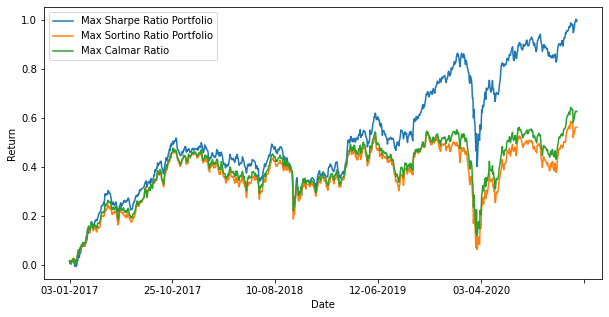

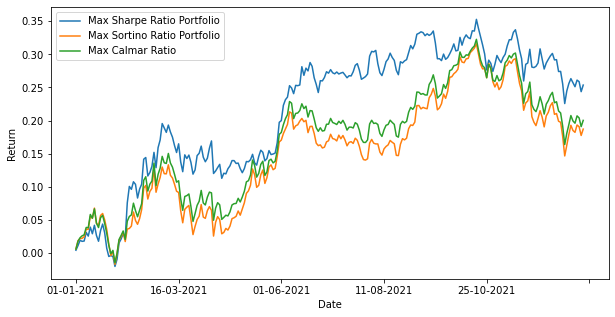

In [26]:
Insample_Result.cumsum().plot(figsize=(10, 5), ylabel = "Return")
OutOfSample_Result.cumsum().plot(figsize=(10, 5), ylabel = "Return")

In [27]:
ret_insample=Insample_Result.mean() * 252
ret_insample

Max Sharpe Ratio Portfolio     0.253715
Max Sortino Ratio Portfolio    0.143398
Max Calmar Ratio               0.159742
dtype: float64

In [28]:
ret_out_of_sample = OutOfSample_Result.mean() * 252
ret_out_of_sample

Max Sharpe Ratio Portfolio     0.257726
Max Sortino Ratio Portfolio    0.190183
Max Calmar Ratio               0.203563
dtype: float64